# **Week 5** 

### **SHORTEST PATH IN WEIGHTED GRAPHS**

**Weighted graphs**
- BFS explores a graph level by level
- BFS compputes shortest path,in terms of number of edges, to every reachable vertex
- May assign values to edges
  - Cost, time, distance,...
  - Weighted graphs
- $G$ = ($V, E$), $W$ : $E \to \mathbb{R}$

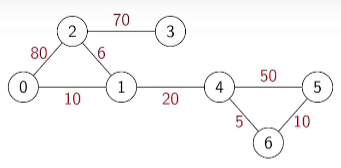

- Adjacency matrix: Record the weights along with edge information - weight is always 0 if no edge

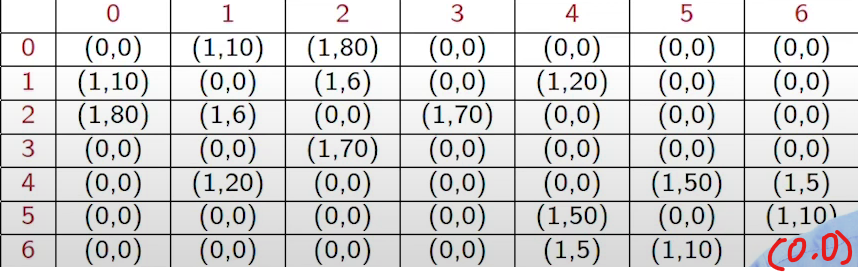

 - Adjacency list: Record weights along with the edge information

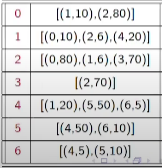

**Shortest paths in weighted graphs**
- BFS computes shortest path, in terms of number of edges, to every reachable vertex
- In a weighted graph, add up the weights along a path
-Weighted shortest path need not have minimum number of edges
  - Shortest path from 0 to 2 is via 1 (weight = 16)

**Shortest path problems** <br>
*Single source shortest paths*
- Find shortest paths from a fixed vertex to every other vertex
- Transport finished product from factory (single source) to all retail outlets
- Courier company delivers items from distribution centre (single source) to addresses 

*All pairs shortest path* <br>
- Find shortest paths between every pair of vertices $i$ and $j$
- Optimal airline, railway, road routes between cities

**Negative edges weights**
- Can negative edge weights be meaningful?
- Taxi driver trying to head home at the end of the day
  - Roads with few customer, drive empty (positive weight)
  - Roads with many customers, make profit (negative weight)
  - Find route towards home that minimizes cost

*Negative cycles*
- A negative  cycle is one whose weight is negative
  - Sum of the weights of edges that make up the cycle
- By repeatedly traversing a negative cycle, total cost keeps decreasing
- If a graph has a negative cycle, total cost keeps decreasing
- Without negative cycles, we can compute shortest paths even if some weights are negative

**Summary**
- In a weighted graph, each edge has a cost
  - Entries in adjacency matrix capture edge weights
- Length of a path is the sum of the weights
  - Shortest path in a weighted graph need not be minimum in terms of number of edges
- Different shortest path problems
  - Single source - from one designated vertex to all others
  - All-pairs - Between every pair of vertices
- Negative edge weights
  - Should not have negative cycles
  - Without negative cycles, shortest paths still well defined


### **SINGLE SOURCE SHORTEST PATHS**

**Single source shortest paths**
- Weighted graph:
  - $G$ - ($V, E$)
  - $W$ : $E \to \mathbb{R}$
- Single source shortest paths
  - Find shortest paths from a fixed vertex to every other vertex
- Assume, for now, that edge weights are all non-negative

- Compute shortest path from 0 to all other vertices
- Imagine vertices are oil depots, edges are pipelines 
- Set fire to oil depot at vertex 0
- Fire travels at uniform speed along each pipeline
- First oil depot to catch fire after 0 is nearest vertex
- Next oil depot is second nearest vertex
- ...

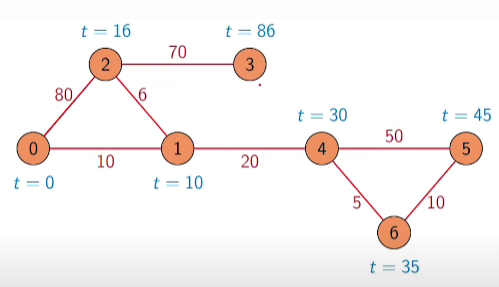

- Compute expected burn time for each vertex
- Each time a new vertex burns, update the expected burn times of its neighbours
- Algorithm due to Edsger W Dikjstra

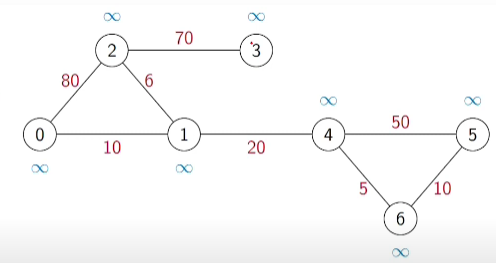

**Dikjstra's algorithm: Proof of correctness**
- Each new shortest path we discover extends an earlier one (Greedy method)
- By induction, assume we have found shortest paths to all vertices already burnt 

- Next vertex to burn is $v$, via $x$
- Can't find a shorter path later from $y$ to $v$ via $w$
  - Burn time of $w$ $\ge$ burn time of $v$
  - Edge from $w$ to $v$ has weight $\ge$ 0
- This argument breaks down if edge ($w,v$) can have negative weight
  - Can't use Dikjstra's algorithm with negative edge weights

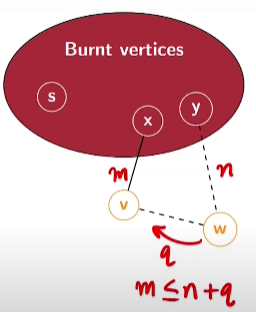

**Implementation**
- Maintain 2 dictionaries with vertices as keys
  - `visited` initially `False` for all $v$ (burnt vertices)
  - `distance` initially `infinity` for all $v$ (expected burn time)
- Set `distance[s]` to $0$
- Repeat, until all reachable vertices are visited
  - Find unvisited vertex `nextv` with minimum distance
  - Set `visited[nextv]` to `True`
  - Recompute `distance[v]` for every neighbour `v` of `nextv`

In [7]:
def dijkstra(WMat, s): 
  # s is the source vertex; WMat is the weighted adj matrix
  (rows,cols,x) = WMat.shape # x is the edge/weight info
  # x[0] edge info; x[1] weight info
  infinity = np.max(WMat) * rows + 1
  # max value in the matrix multipied by rows + 1 is larger than all
  (visited, distance) = ({},{})
  for v in range(rows):
    (visted[v], distance[v]) = (False, infinity)
  distance[s] = 0
  for u in range(rows):
    nextd = min([distance[v] for v in range(rows) if not visted[v]])
    nextvlist = [v for v in range(rows) if(not visited[v]) and distance[v] == nextd]
    if nextvlist == []:
      break
    nextv = min(nextvlist)
    visited[nextv] = True
    for v in range(cols):
      if WMat[nextv,v,0] == 1 and (not visited[v]):
        distance[v] = min(distance[v],distance[nextv] + WMat[nextv,v,1])
  return(distance)

**Complexity**
- Setting `infinity` takes $O(n^2)$ time
- Main loop runs $n$ times
  - Each iteration visits one more vertex
  - $O(n)$ to find next vertex to visit
  - $O(n)$ to update `distance[v]` for neighbours
- Overall $O(n^2)$
- If we use an adjacency list
  - Setting `infinity` and updating distances both $O(m)$, amortised
  - $O(n)$ bottleneck remains to find next vertex to visit
  - Better data structure? Later

In [6]:
def dijkstralist(WList, s):
  infinity = 1 + len(WList.keys()) * max([d for u in WList.keys() for (v,d) in WList[u]])
  (visited,distance) = ({},{})
  for v in WList.keys():
    (visited[v], distance[v]) = (False,infinity)
  distance[s] = 0
  for u in WList.keys():
    nextd = min([distance[v] for v in WList.keys() if not visited[v]])
    nextvlist = [v for v in WList.keys() if (not visited[v]) and distance[v] == nextd]
    if nextvlist == []:
      break
    nextv = min(nextvlist)
    visited[nextv] = True
    for (v,d) in WList[nextv]:
      if not visited[v]:
        distance[v] = min(distance[v], distance[nextv])
  return(distance)

**Summary**
- Dijkstra's algorithm computes single source shortest paths
- Use a greedy strategy to identify vertices to visit
  - Next vertex to visit is based on shortest distance computed so far
  - Need to prove that such a strategy is correct
  - Correctness requires edge weights to be non-negative
- Complexity is $O(n^2)$
  - Even with adjacency lists
  - Bottleneck is identifying unvisited vertex with minimum distance
  - Need a better data structure to identify and remove minimum (or maximum) from a collection 

### **SINGLE SOURCE SHORTEST PATHS WITH NEGATIVE WEIGHTS**

**Dijkstra's Algorithm** <br>
*Burning pipe analogy*
- We keep track of the following
  - The vertices that have been burnt
  - The expected burn time of vertices
- Initially
  - No vertex is burnt
  - Expected burn time of vehicles
  - Expected burn time of rest is $\infty$
- While there are vertices yet to burn
  - Pick unburnt vertex with minimum expected burn time, mark it s burnt
  - Update the expected burn time of its neighbours


*Initialization* (assume source vertex 0)
- $B(i)$ = `False`, for $0 \le i \lt n$
  - UB = {$k$ | $B(k)$ = `False`}
- $EBT(i) = 
     \begin{cases}
       \text{0,} &\quad\text{if i = 0}\\
       \infty &\quad\text{otherwise.} \\ 
     \end{cases} 
$

*Update, if* $UB \ne \emptyset$
- Let $j \in UB$ such that $EBT(j) \le EBT(k)$ for all $k \in UB$
- Update $B(j)$ = `True`,$UB = UB$ \ { $j$ }
- For each ($j,k$) $\in E$ such that $k \in UB$, $EBT(k) = min( EBT(k), EBT(j) + W(j,k))$

**Extending to negative edge weights**
- The difficulty with negative edge weights is that we stop updating the burn time once a vertex is burnt
- What if we allow updates evenafter a vertex is burnt?
- Negative edge weights are allowed, but no negative cycles
- Going around a cycle can only add to the length
- Shortest route to every vertex is a path, no loops

- Suppose minimum weight path from 0 to $k$ is

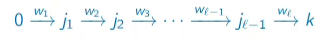

- Need not be minimum in terms of number of edges
- Every prefix of this path must be a minimum weight path

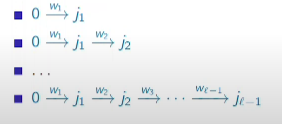

- Once we discover shortest path to $j_{l-1}$, next update will fix shortest path to $k$
- Repeatedly update shortest distance to each vertex based on shortest distance to its neighbours
  - Update cannot push this distance below actual shortest distance
- After $l$ updates,all shortest paths using $\ge l$ edges have stabilized
  - Minimum weight path to any node has at most $n-1$ edges
  -After $n-1$ update, all shortest paths have stabilized

**Bellman-Ford Algorithm** <br>
*Initialization* (source vertex 0)
- $D(j)$ : minimum distance known so far to vertex $j$
- $D(j) = 
     \begin{cases}
       \text{0,} &\quad\text{if j = 0}\\
       \infty &\quad\text{otherwise.} \\ 
     \end{cases} 
$

*Repeat $n-1$ times*
- For each vertex $j \in$ {$0, 1,..., n-1$}, for each edge ($j,k$) $\in E$, 
$D(k) = min(D(k), D(j) + W(j,k))$
<br> <br> **Works for directed and undirected graphs** 

In [5]:
def bellmanford(WMat,s):
  (rows,cols,x) = WMat.shape
  infinity = np.max(WMat)*rows + 1
  distance = {}
  for v in range(rows):
    distance[v] = infinity
  distance[s] = 0
  for i in range(rows):
    for u in range(rows):
      for v in range(cols):
        if WMat[u,v,0] == 1:
          distance[v] = min(distance[v], distance[u] + WMat[u,v,1])
  return(distance)

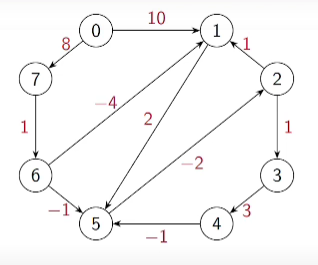

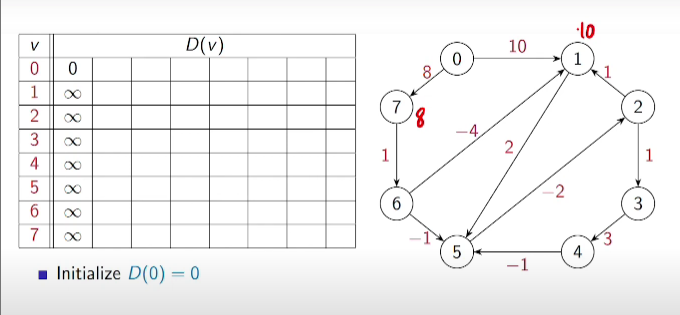

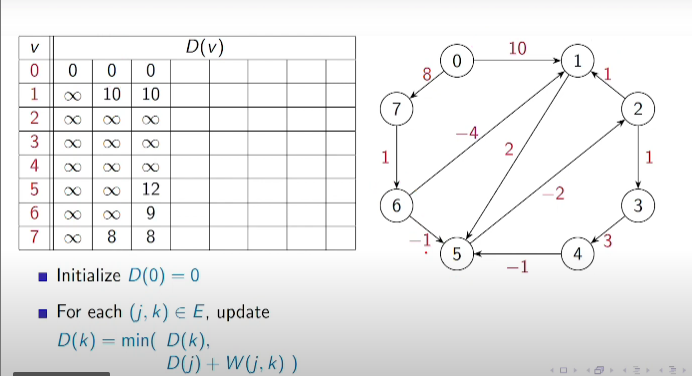

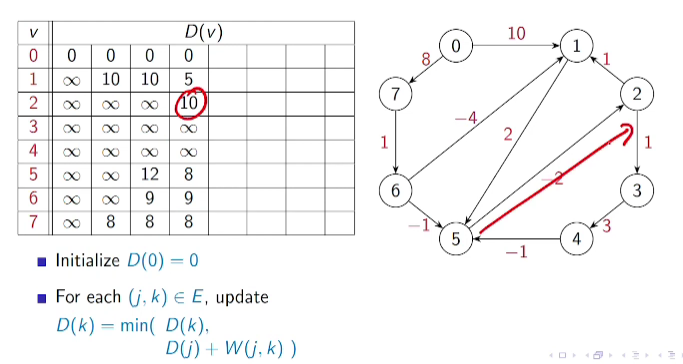


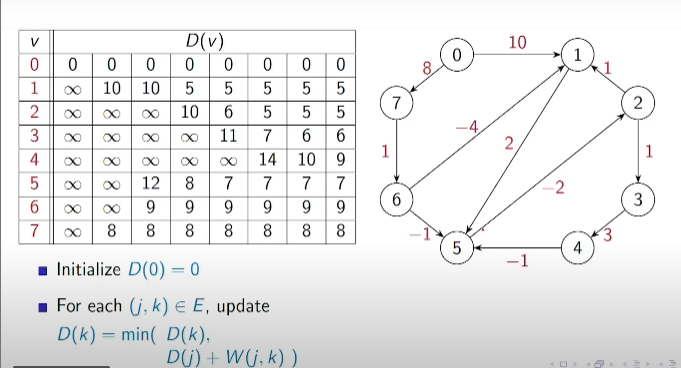

- What if there was a negative cycle? Distance would continue to decrease
- Check if update $n$ reduces any $D(v)$

**Complexity**
- Initialising `infinity` takes $O(n^2)$ time
- The outer update loop runs $O(n)$ times 
- In each iteration, we have to examine every edge in the graph
  - This take $O(n^2)$ for an adjacency matrix
- Overall, $O(n^3)$

- If we shift to adjacency lists
  - Initializing `infinity` is $O(m)$
  - Scanning all edges in each update iteration is $O(m)$

In [ ]:
def bellmanfordlist(WList,s):
  infinity =  1 + len(WList.keys())*max([d for u in WList.keys() for (v,d) in WList[u]])
  distance = {}
  for v in WList.keys():
    distance[v] = infinity
  
  distance[s] = 0

  for i in WList.keys():
    for u in WList.keys():
      for (v,d) in WList[u]:
        distance[v] = min(distance[v], distance[u] + d)
  return(distance)

**Summary**
- Dijkstra's algorithm assumes non-negative edge weights
  - Final distance is frozen each time a vertex "burns"
- Without negative cycles, every shortest route is a path
- Every prefix of a shortest path is also a shortest path
- Iteratively find shortest paths of length $1,2,...,n-1$
- Update distance to each vertex with every iteration - *Bellman-Ford algorithm*
- $O(n^3)$ time with adjacency matrix, $O(mn)$ time with adjacency list
- If Bellman-Ford algorithm does not converge after $n-1$ iterations, there is a negative cycle


### **ALL PAIRS SHORTEST PATHS (FLOYD-WARSHALL ALGORITHM)**

**Shortest paths in weighted graphs**
<br> Two types of shortest path problems of interest <br>
*Single source shortest paths*
- Find shortest paths from a fixed vertex to every other vertex
- Transport finished product from factory (single source) to all retail outlets
- Courier company delivers items from distribution centre (single source) to addresses

*All pairs shortest paths* 
- Find shortest paths between every pair of vertices $i$ and $j$
- Optimal airline, railway, road routes between cities
- Run Dijkstra or Bellman-Ford from each vertex
- Is there is another way?

**Transitive closure**
- Adjacency matrix $A$ represents paths of length 1
- Matrix multiplication, $A^2$ = $A$ x $A$
  - $A^2[i,j] = 1$ if there is a path of length 2 from $i$ to $j$
  - For some $k$, $A[i,k] = 1$, $A[k,j] = 1$
- $A^+ = A + A^2 + ... + A^{n-1}$


*An alternative approach*
- $B^k[i,j] = 1$ if there is path from $i$ to $j$ via vertices {$0,1, ..., k-1$}
  - Constraint applies only to intermediate vertices between $i$ and $j$
  - $B^0[i,j] = 1$ if there is a direct edge 
  - $B^0 = A$
- $B^{k+1}[i,j] = 1$ if
  - $B^k[i,j] = 1$ - can already reach $j$ from $i$ via {$0,1,...,k-1$}
  - $B^k[i,k] = 1$ and $B^k[k,j] = 1$ - use {$0,1,...,k-1$} to go from $i$ to $k$ and then from $k$ to $j$

**Warshall's Algorithm**
- $B^k[i,j] = 1$ if there is path from $i$ to $j$ via vertices {$0,1,...,k-1$}
- $B^0[i,j] = A[i,j]$ 
  - Direct edges, no intermediate vertices
- $B^{k+1}[i,j] = 1$ if 
  - $B^k[i,j] = 1$, or
  - $B^k[i,k] = 1$ and $B^k[k,j] = 1$
- This algorithm also computes transitive closure - Warshall's algorithm
- $B^n[i,j] = 1$ if there is some path from $i$ to $j$ with intermediate vertices in {$0,1,...,n-1$}
- $B^n = A^+$
- We adapt Warshall's algorithm to compute all-pairs shortest paths

**Floyd-Warshall Algorithm**
- Let $SP^k[i,j]$ be the length of the shortest path $i$ to $j$ via vertices {$0,1,...,k-1$}
- $SP^0[i,j] = W[i,j]$
  - No intermediate vertices, shortest path is weight of direct edge
  - Assume $W[i,j] = \infty$ if ($i,j$) $\not\in E$
- $SP^{k+1}[i,j]$ is the minimum of
  - $SP^k[i,j]$ <br> Shortest path using only {$0,1,...,k-1$}
  - $SP^k[i,k] + SP^k[k,j]$ <br> Combine shortest path from $i$ to $k$ and $k$ to $j$

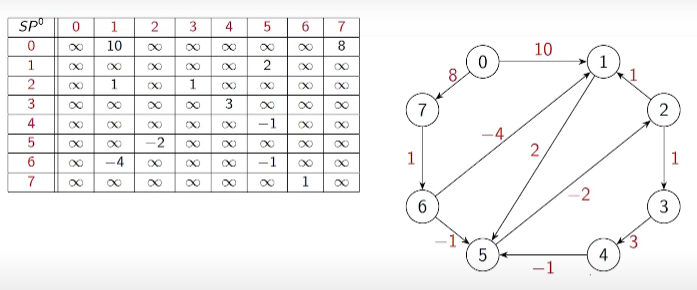

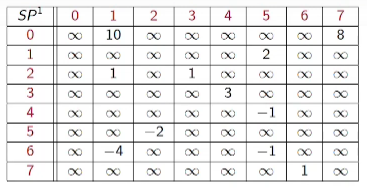

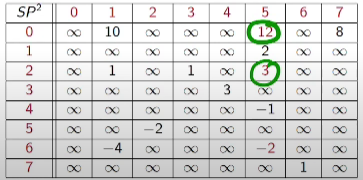

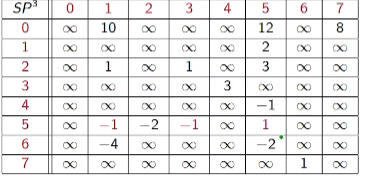

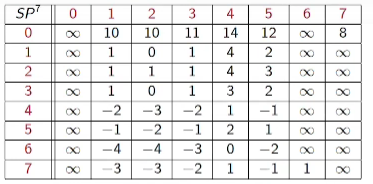

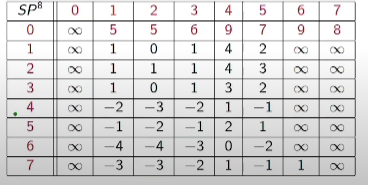

**Implementation**
- Shortest path matrix $SP$ is $n$ x $n$ x ($n+1$)
- Initialize $SP[i,j,0]$ to edge weight $W(i,j)$, or $\infty$ if no edge
- Update $SP[i,j,k]$ from $SP[i,j,k-1]$ using the Floyd-Warshall update rule
- Time complexity is $O(n^3)$
- We only need $SP[i,j,k-1]$ to compute $SP[i,j,k]$
- Maintain two "slices" $SP[i,j]$, $SP'[i,j]$, compute $SP'$ from $SP$, copy $SP'$ to $SP$, save space

In [4]:
def floydwarshall(WMat):
  (rows, cols, x) = WMat.shape
  infinity = np.max(WMat) * rows * rows + 1
  SP = np.zeros(shape=(rows,cols,cols+1))
  for i in range(rows):
    for j in range(cols):
      SP[i,j,0] = infinity
  for i in range(rows):
    for j in range(cols):
      if WMat[i,j,0] == 1:
        SP[i,j,0] = WMat[i,j,1]
  
  for k in range(1,cols+1):
    for i in range(rows):
      for j in range(cols):
        SP[i,j,k] = min(SP[i,j,k-1], SP[i,k-1,k-1]+SP[k-1,j,k-1])
  return(SP[:,:,cols])

**Summary**
- Warshall's algorithm is an alternative way to compute transitive closure
  - $B^k[i,j] = 1$ if we can reach $j$ from $i$ using vertices in {$0,1,...,k-1$}
- Adapt Warshall's algorithm to compute all pairs shortest paths
  - $SP^k[i,j]$ is the length of the shortest path from $i$ to $j$ using vertices in {$0,1,...,k-1$}
  - $SP^n[i,j]$ is the length of the overall shortest path
  - Floyd-Warshall algorithm
- Works with negative edge weights, assuming no negative cycles
- Simple nested loop implementation, time $O(n^3)$
- Space can be limited to $O(n^2)$by reusing two "slices" $SP$ and $SP'$

### **MINIMUM COST SPANNING TREES**

**Spanning trees**
- Retain a minimal set of edges so that graph remains connected
- A minimally connected graph is a tree
  - Adding an edge to a tree creates a loop
  - Removing an edge disconnects the graph
- Want a tree tht connects all the vertices - spanning tree

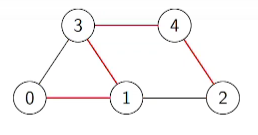

**Spanning trees with costs**
- Restoring a road or laying a fibre optic cable has a cost
- Minimum cost spanning tree
  - Add the cost of all edges in the tree
  - Among the different spanning trees, choose one with minimum cost
- Example
  - Spanning tree, Cost is 114 - not minimum cost spanning tree
  - Another spanning tree, Cost is 44 - minimum cost spanning tree

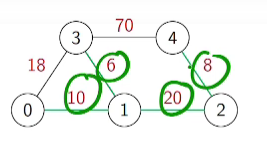

**Some facts about trees**
<br> **Defn**: A tree is a connected acyclic graph <br>
*Fact 1*: A tree on $n$ vertices has exactly $n-1$ edges
- Initially, one single component
- Deleting edge ($i,j$) msut split component
  - Otherwise, there is still a path from $i$ to $j$, combine with ($i,j$) to form cycle
- Each edge deletion creates one more component
- Deleting $n-1$ edges creates $n$ components, each an isolated vertex

*Fact 2*: Adding an edge to a tree must create a cycle
- Suppose we add an edge ($i,j$)
- Tree is connected, so there is already a path from $i$ to $j$ forms a cycle

*Fact 3*: In a tree, every pair of vertices is connected by a unique path
- If there are two paths from $i$ to $j$, there must be a cycle

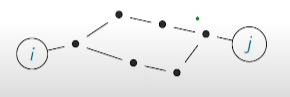

*Observation*: Any two of the following facts about a graph $G$ implies the third
  - $G$ is connected
  - $G$ is acyclic
  - $G$ has $n-1$ edges

**Summary**
- We will use these facts about trees to build minimum cost spanning trees
- Two natural strategies
- Start with the smallest edge and "grow" a tree
  - Prim's algorithm
- Scan the edges in ascending order of weight to connect components without forming cycles
  - Kruskal's algorithm

### **MINIMUM COST SPANNING TREES - PRIM'S ALGORITHM**

**Minimum Cost Spanning tree (MCST)**
- Weighted undirected graph, 
$G$ = ($V,E$), $W$:$E \to \mathbb{R}$
  - $G$ assumed to be connected
- Find a minimum cost spanning tree
  - Tree connecting all vertices in $V$
- *Strategy*
  - Incrementally grow the minimum cost spanning tree
  - Start with a smallest weight edge overall
  - Extend the current tree by adding the smallest edge from the tree to a vertex not yet in the tree

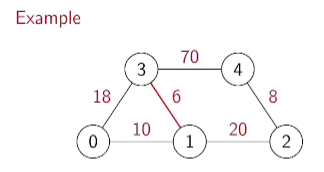

- Start with smallest edge ($1,3$)
- Extend the tree with ($1,0$)
- Can't add ($0,3$), forms a cycle
- Instead, extend the tree with ($1,2$)
- Extend the tree with ($2,4$)


**Prim's algorithm**
- $G$ = ($V,E$), $W : E \to \mathbb{R}$
- Incrementally build an MCST
  - $TV \subseteq V$ : tree vertices, already added to MCST
  - $TE \subseteq E$ : tree edges, already added to MCST  
- Initially, $TV = TE = \emptyset$
- Choose minimum weight edge $e = (i,j)$
  - Set $TV$ = {$i,j$}, $TE$ = {$e$} MCST
- Repeat $n-2$ times
  - Choose minimum weight edge $f = (u,v)$ such that $u \in TV$, $v \not \in TV$
  - Add $v$ to $TV$, $f$ to $TE$

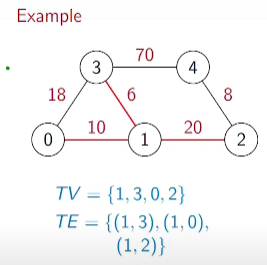

**Correctness of Prim's Algorithm**
<br> *Minimum Separator Lemma*
- Let $V$ be partitioned into two non-empty sets $U$ and $W = V$ \ $U$
- Let $e = (u,w)$ be the minimum cost edge with $u \in U, w \in W$
- Every MCST must include $e$

- Assume for now, all edge weights distinct
- Let $T$ be an MCST, $e \not \in T$
- $T$ contains a path $p$ from $u$ to
  - $p$ starts in $U$, ends in $W$
  - Let $f = (u',w')$ be the first edge on $p$ crossing from $U$ to $W$
  - Drop $f$, add $e$ to get a cheaper spanning tree
- What if two edges have same weights?
- Assign each edge a unique index from 0 to $m-1$
- Define ($e,i) \lt (f,j)$ if $W(e) \lt W(j)$ or $W(e) = W(j)$ and $i \lt j$

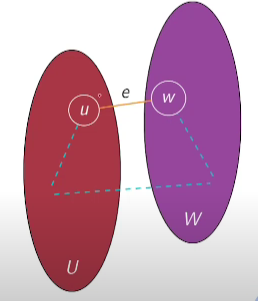

- In Prim's algorithm, $TV$ and $W - V$ \ $TV$ partition $V$
- Algorithm picks smallest edge connecting $TV$ and $W$, which must belong to every MCST
- In fact, for any $v \in V,$ { $v$ } and $V$ \ { $v$ } form a partition
- The smallest weight edge leaving any vertex must belong to every MCST
- We started with overall minimum cost edge
- Instead, can start at any vertex $v$, with $TV$ = { $v$ } and $TE =\emptyset$


**Implementation**
<br> 1) 
- Keep track of
  - `visited[v]` - is $v$ in the spanning tree?
  - `distance[v]` - shortest distance from $v$ to the tree
  - `TreeEdges` - edges in the current spanning tree

In [ ]:
def primlist(WList):
  infinity = 1 + max([d for u in WList.keys() for (v,d) in WList[u]])
  (visited, distance, TreeEdges) = ({},{},[])
  for v in WList.keys():
    (visited[v], distance[v]) = (False, infinity)
  visited[0] = True
  for (v,d) in WList[0]:
    distance[v] = d
  for i in WList.keys():
    (mindist, nextv) = (infinity, None)
    for u in WList.keys():
      for (v,d) in WList[u]:
        if visited[u] and (not visited[v]) and d < mindist:
          (mindist, nextv, nexte) = (d,v,(u,v))
    if nextv is None:
      break
    visited[nextv] = True
    TreeEdges.append(nexte)
    for (v,d) in WList[nextv]:
      if not visited[v]:
        distance[v] = min(distance[v], d)
  return(TreeEdges)

- Initialize `visited[v]` to `False`, `distance[v]` to `infinity`
- First add vertex $0$ to tree
- Find edge ($u,v$) leaving the tree where `distance[v]` is minimu, add it to the tree, update `distance[w]` of neighbours

**Complexity**
- Initialization takes $O(n)$
- Loop to add nodes to the tree runs $O(n)$ times
- Each iteration takes $O(m)$ time to find a node to add
- Overall time is $O(mn)$, which could be $O(n^3)$!

2) 
- For each $v$, keep track of its nearest neighbour in the tree
  - `visited[v]` - is $v$ in the spanning tree?
  - `distance[v]` - shortest distance from $v$ to the tree
  - `nbr[v]` - nearest neighbour of $v$ in tree
- Scan all non-tree vertices to find `nextv` with minimum distance
- Very similar to Dijkstra's algorithm,except for the update rule for distance
- Like Dijksta's algorithm, this is still $O(n^2)$ even for adjacency lists
- With a more clever data structure to extract the minimum, we can do better

In [3]:
def primlist2(WList):
  infinity = 1 + max([d for u in WList.keys() for (v,d) in WList[u]])
  (visited, distance, nbr) = ({},{},{})
  for v in WList.keys():
    (visited[v],distance[v], nbr[v]) = (False, infinity, -1)
  visited[0] = True
  for (v,d) in WList[0]:
    (distance[v], nbr[v]) = (d,0)
  for i in range(1, len(WList.keys())):
    nextd = min([distance[v] for v in WList.keys() if not visited[v]])
    nextvlist =[v for v in WList.keys() if (not visted[v]) and distance[v] == nextd]
    if nextvlist == []:
      break
    nextv = min(nextvlist)
    visited[nextv] = True
    for (v,d) in WList[nextv]:
      if not visited[v]:
        (distance[v],nbr[v]) = (min(distance[v], d), nextv)
  return(nbr)

**Summary**
- Prim's algorithm grows an MCST starting with any vertex
- At each step, connect one more vertex to the tree using minimum cost edge from inside the tree to outside the tree
- Correctness follows from Minimum Seperator Lemma
- Implementation similar to Dijksta's algorithms
  - Update rule for distance is different
- Complexity is $O(n^2)$
  - Even with adjacency lists
  - Bottleneck is identifying unvisited vertex with minimum distance
  - Need a better data structure to identify and remove minimum (or maximum) from a collection

### **MINIMUM COST SPANNING TREES - KRUSAL'S ALGORITHM**

**Minimum Cost Spanning tree** (MCST)
<br> *Strategy 2*
- Start with $n$ components, each a single vertex
- Process edges in ascending order of cost
- Include edge if it does not create a cycle

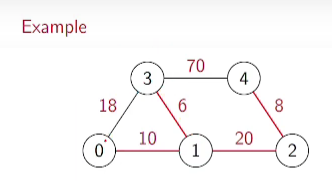

- Start with smallest edge, ($1,3$)
- Add next smallest edge, ($2,4$)
- Add next smallest edge, ($0,1$)
- Can't add ($0,3$), forms a cycle
- Add next smallest edge, ($1,2$)

**Kruskal's Algorithm**
- $G = (V, E), W : E \to \mathbb{R}$
- Let $E =$ {$e_0,e_1,...e_{m-1}$} be edges sorted in asceding order by weight
- Let $TE \subseteq E$ be the set of tree edges already added to MCST
- Initially, $TS = \emptyset$
- Scan $E$ from $e_0$ to $e_{m-1}$
  - If adding $e_i$ to $TE$ creates a loop, skip it
  - Otherwise, add $e_i$ to $TE$

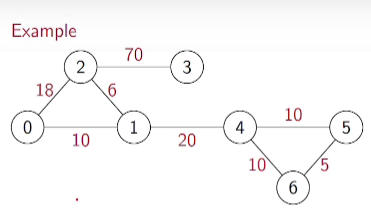

- Sort $E$ as {$(5,6),(1,2),(0,1),(4,5),(0,2),(1,4),(2,3)$}
- Set $TE = \emptyset$
- Kepe adding each into $TE$ after checking
- $TE =$ {$(5,6),(1,2),(0,1),(4,5),(1,4),(2,3)$}


**Correctness of Kruskal's Algorithm**
<br> From *Minimum Separator Lemma*
- Edges in $TE$ partition vertices into connected components
  - Initially each vertex is a separate component
- Adding $e = (u,w)$ merges components of $u$ and $w$
  - If $u$ and $w$ are in the same component, $e$ forms a cycle and is discarded 
- Let $U$ be component of $u$, $W$ be $V$ \ $U$
  - $U$, $W$ form a partition of $V$ with $u \in U$ and $w \in W$
  - Since we are scanning edges in ascending order of cost, $e$ is minimum cost edge connecting $U$ and $W$,soit must be part of any MCST



**Implementaion**
- Collect edges in a list as (d,u,v)
  - Weight as first component for easy sorting
- Main challenge is to keep track of connected components
  - Dictionary to record component of each vertex
  - Initially each vertex is an isolated component
  - When we add an edge ($u,v$), merge the components of $u$ and $v$

In [2]:
def kruskal(WList):
  (edges, component, TE) = ([],{},[])
  for u in WList.keys():
    # Weight as first component to sort easily
    edges.extend([(d,u,v)] for (v,d) in WList[u])
    component[u] = u
  edges.sort()
  print(edges)

  for (d,u,v) in edges:
    if component[u] != component[v]:
      TE.append((u,v))
      c = component[u]
      for w in WList.keys():
        if component[w] == c:
          component[w] = component[v]
  return(TE)


**Analysis**
- Sorting the edges is $O(mlogm)$
  - Since $m$ is atmost $n^2$, equivalently $O(mlogn)$
- Outer loop runs $m$ times
  - Each time we add a tree edge, we have to merge components - $O(n)$ scan
  - $n-1$ tree edges, so this is done $O(n)$ times
- Overall $O(n^2)$
- Bottleneck is naive strategy to label and merge components
- Components partition vertices
  - Collection of disjoint sets
- Data structure to maintain collectio of disjoint sets
  - `find(v)` - return set containing $v$
  - `union(u,v)` - merge sets of $u,v$
- Efficient union-find brings complexity down to $O(mlogn)$

**Summary**
- Kruskal's algorithm builds an MCST bottom up
  - Start with $n$ components, each an isolated vertex
  - Scan edges in ascending order of cost
  - Whenever an edge merges disjoint components, add it to the MCST
- Correctness follows from Minimum Separator Lemma
- Complexity is $O(n^2)$ due to naive handling components
  - Will see he to improve to $O(mlogn)$
- If edge weights repeat, MCST is not unique
- "Choose minimum cost edge" will allow choices
  - Consider a triangle on 3 vertices with all edges equal
- Different choices lead to different spanning trees
- In general, there may be a very number of minimum cost spanning trees
